# Final Exam (part 1) - Computational Physics I

### Deadline: Tuesday 10 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Alan Palma Travez

## 1. Symbolic algebra: sympy for physics (10 points) 

## 1.1. Lennard-Jones Potential and Forces (optimisation, 5 points)

The potential energy of a particle in a field has the form:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

where $r$ is the distance between the particles, $\epsilon$ is the depth of the potential well describing the strength of the attraction, and $\sigma$ is the distance at which the potential energy is zero.

(a) Create a python function to compute this potential $V(r)$ as a function of $r$ for fiducial values of $\epsilon$ and $\sigma$.

Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$.



In [1]:
# Third party libraries

import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sympy as sp

# To see the outputs in latex format
from sympy.interactive import printing
printing.init_printing(use_latex = True)

In [2]:
plt.style.use(['science', 'notebook', 'no-latex']) #define the style for plotting

In [3]:
# Create a python function

def LJ_potential(r, sig, eps):
    """
    Function to compute the Lennard-Jones Potential given the depth of the potential (eps), and 
    the distance at witch the potential energy is zero.
    Inputs:
        r: distance 1D array (float)
        sig: distance at witch the potential energy is zero (float)
        eps: depth of the potential (float)
    Outputs: Lennard-Jones Potential, 1D array (float)
    Author: Alan Palma
    """

    v = 4. * eps*((sig/r)**12-(sig/r)**6)

    return v

In [4]:
# Create an array for distance between particles
# The range should be short

r_arr = np.linspace(3.3e-10, 11.e-10, 1000) # In meters

#Define values for sigma and epsilon

s = 3.40e-10 # meters
e = 4.0e-21 # Joules

# print(r_arr.shape)

In [5]:
# Evaluate the function

v = LJ_potential(r_arr, s, e)

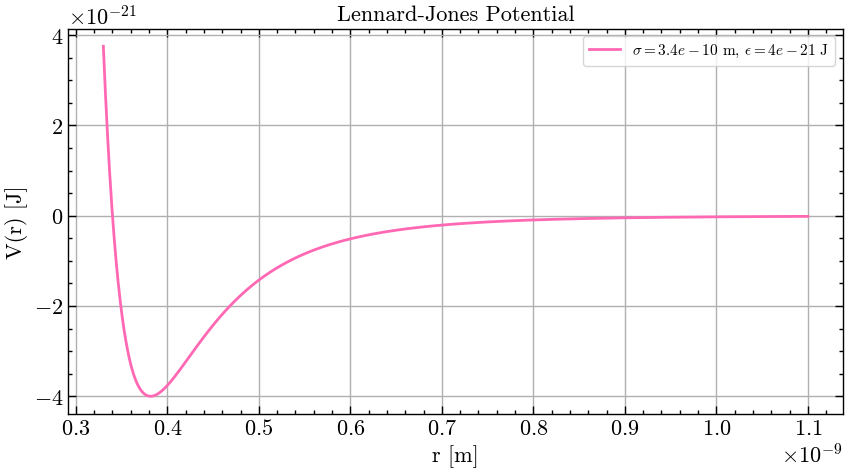

In [6]:
# Plotting the potential

plt.figure(figsize=(10,5))

plt.plot(r_arr, v, color = "hotpink", label = f"$\\sigma = {s}$ m, $\\epsilon = {e}$ J")

plt.title("Lennard-Jones Potential")
plt.xlabel("r [m]")
plt.ylabel("V(r) [J]")

plt.grid()
plt.legend(frameon = True, fontsize = 11.)

plt.show()

(b) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$ experienced by a particle at a distance $r$.

Then, lambdify your expression and plot the $F(r)$ versus $r$.

In [7]:
# We define symbols for variables:

# For variables:
r, sigma, epsilon = sp.symbols('r sigma epsilon', real = True)


#Define again the potential using symbols

V_sym = 4. * epsilon*((sigma/r)**12-(sigma/r)**6)


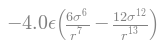

In [8]:
#Diferentiate using sympy

F_sym = - sp.diff(V_sym, r)

# Lambdify the force 

F_lamb = sp.lambdify((r, sigma, epsilon), F_sym)

display(F_sym)

In [9]:
#Evaluate the function

F = F_lamb(r_arr, s, e)

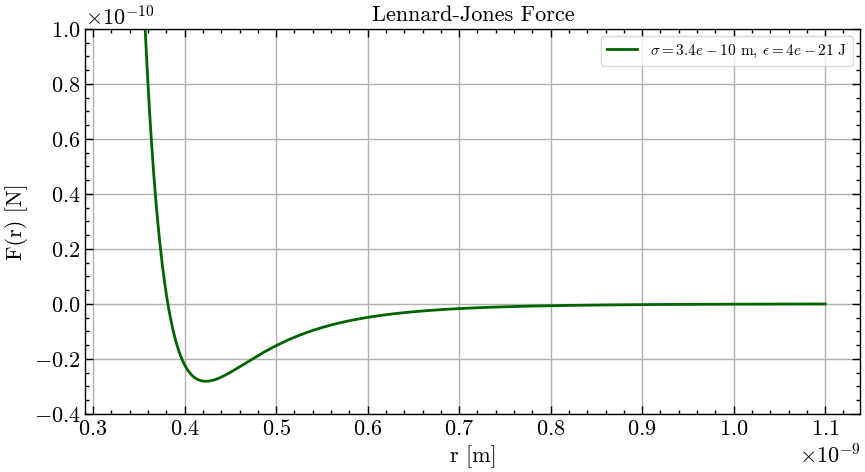

In [27]:
# Plotting the force

plt.figure(figsize=(10,5))

plt.plot(r_arr, F, color = "darkgreen", label = f"$\\sigma = {s}$ m, $\\epsilon = {e}$ J")

plt.title("Lennard-Jones Force")
plt.xlabel("r [m]")
plt.ylabel("F(r) [N]")

# plt.xlim(0.35e-9, r_arr[-1])
plt.ylim(-0.4e-10, 1.0e-10)

plt.grid()
plt.legend(frameon = True, fontsize = 11.)

plt.show()

(c) Find the maximum possible value of the attractive force, $F_{max}$, and the distance, $r_{max}$, at which the particle would be subjected to this force.


Let's find the maximum values by using scipy so first let's differentiate our the force $F(r)$ and then equal it to zero:

$$
\frac{dF(r)}{dr} = 0
$$

The force diferentiated is: 


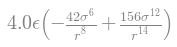

The equation for finding the minimum: 


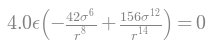

In [11]:
# Differentiate the function F(r)

F_d = - sp.diff(F_sym, r)

# Equaling to zero to find maximum force

F_eq = sp.Eq(F_d, 0)


print("The force diferentiated is: ")
display(F_d)
print("The equation for finding the minimum: ")
display(F_eq)


In [12]:
# Solve the equation

result = sp.solve(F_eq , r)

# Lambdify the result

result_lambdify = sp.lambdify((sigma, epsilon), result)

# Evaluate the expression for our sigma and epsilon chosen

r_max = result_lambdify(s, e)[1] #Indexing to choose the correct answer

# Evaluate the r_max in the Force function to get F_max

F_max = F_lamb(r_max, s, e)

In [13]:
# Report the results 

print(f"The distance r_max at which the atractive force is maximum: { '%.2e' % r_max} m")
print(f"The maximum force F_max found: {'%.2e' % abs(F_max)} N")

The distance r_max at which the atractive force is maximum: 4.23e-10 m
The maximum force F_max found: 2.82e-11 N


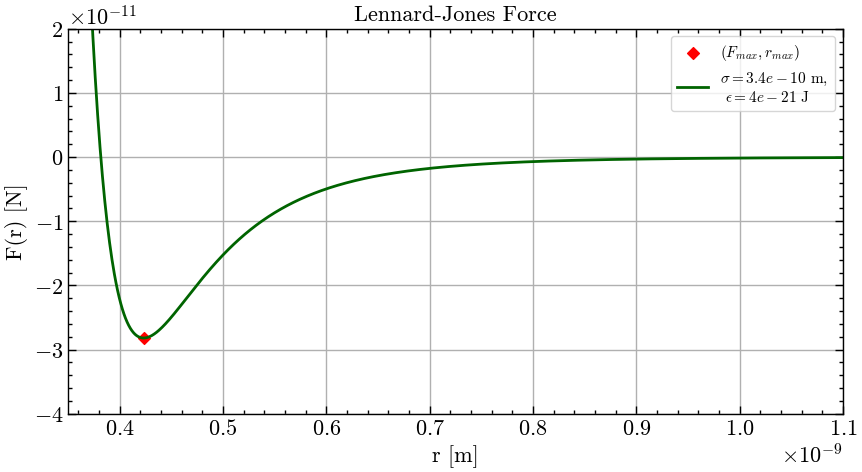

In [14]:
# Plotting the maximum force found

plt.figure(figsize=(10,5))

plt.scatter(r_max, F_max, color = "red", marker = "D", label = "$(F_{max},r_{max})$")
plt.plot(r_arr, F, color = "darkgreen", label = f"$\\sigma = {s}$ m, \n $\\epsilon = {e}$ J")

plt.title("Lennard-Jones Force")
plt.xlabel("r [m]")
plt.ylabel("F(r) [N]")

plt.xlim(0.35e-9, r_arr[-1])
plt.ylim(-0.4e-10, 2e-11)

plt.grid()
plt.legend(frameon = True, fontsize = 11.)

plt.show()

#### Please provide your answers to these questions in a markdown cell:

(d) Describe the behavior of the potential at short and long distances.

At which "equilibrium" distance, $r_0$, does the force become zero?

In [15]:
#Find at which distance the force become zero

r_eq_eq = sp.solve(sp.Eq(F_sym, 0.), r)

# Lambdify the result

r_eq_eq_lambdify = sp.lambdify((sigma, epsilon), r_eq_eq)

# Evaluate the r_max in the Force function to get F_max

r_eq =r_eq_eq_lambdify(s, e)[1] # Indexing to choose the apropiate value

# print(r_eq)

# Evaluate in F(r) to check the result

F_eq = F_lamb(r_eq, s, e)

# print(F_eq)

In [16]:
# Report the result

print(f"The distance r at which the force become zero is: {'%.2e' % r_eq} m")

The distance r at which the force become zero is: 3.82e-10 m


- At very short distances, the force is repulsive, causing the particles to move apart. As the distance increases, the repulsive force decreases until it reaches a point of zero force (equilibrium). In this case, the equilibrium distance is $3.82 \times 10^{-10}$. Beyond this point, the force becomes attractive. The attractive force (negative sign) increases as the distance grows until it reaches a maximum.

- At very long distances, the attractive force decreases and approaches zero as r tends to infinity.

(e) Discuss the physical significance of the Lennard-Jones potential in real-world systems (e.g. the meaning of $\sigma$ and $\epsilon$).

Provide 2 examples of systems where this potential is applicable.

- This potential is an excellent model for representing the interaction between particles and more systems, as it describes both repulsive and attractive interactions across the entire range of possible distances $r$.

- When $r = \sigma$, the potential becomes zero, meaning $\sigma$ represents the distance at which the potential transitions from repulsive to attractive forces or it is reched a "equilibrium position"

- $\epsilon$ represents the strength of the interaction; larger values of $\epsilon$ correspond to deeper potential, indicating stronger interactions.  

- This potential is particularly effective for modeling interactions between molecules so it is used in molecular dynamics and has applications in solid state physics, including explaining phase transitions.  

## 1.2. Population dynamics (solutions to ODEs, 5 points)

The **Verhulst-Pearl model** is used to study animal population dynamics. This model is also called **logistic growth model** and assumes that $P(t)$ satisfies the following ODE:


$$\frac{dP}{dt}=\alpha\,P\left(1-\frac{P}{\beta}\right)$$


where $\alpha$ is the growth rate and $\beta$ is the limiting size for the population (also called the environment carrying capacity).

(a) Use sympy to find the general analytical solution to this ODE.


In [17]:
# Define symbols for variables and functions:

# For variable t and parameters:
t, alpha, beta = sp.symbols('t alpha beta')

# For function P(t):
P = sp.Function('P')

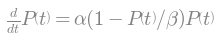

In [18]:
# Derivatives:

der_P1 = P(t).diff(t)

# Differential equation

diffeq = sp.Eq(der_P1, alpha*P(t)*(1-(P(t)/beta)))

display(diffeq)

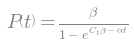

In [19]:
# Solve the ODE

result = sp.dsolve(diffeq, P(t))

display(result)


(b) Imagine we use this equation to study the population dynamics of a bird species re-introduced into nature, knowing that the test environment can only host $20$ individuals. We liberate $10$ individuals of this species in the wild, and we know that the growth rate is $0.2$ individuals per month. Rewrite and recompute both the ODE and its solution for this set of conditions.

For this case, it is need to define the parameters of the ODE:

$$
\beta = 20, \; \alpha = 0.2
$$

, and the intial condition is: 

$$
P(t=0) = 10
$$

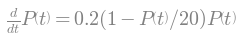

In [20]:
# Define the parameters

b = 20
a = 0.2

# Derivatives:

der_P1 = P(t).diff(t)

# Differential equation

diffeq = sp.Eq(der_P1, a*P(t)*(1-(P(t)/b)))

display(diffeq)

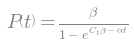

In [21]:
# Solve the ODE with the defined parameters

sol = sp.dsolve(diffeq, P(t), ics = {P(0):10})

display(result)

(c) Lambify your expression, make a plot of the analytical solution and label it appropriately.

In [22]:
#Lambdify the resultant function

sol_lamb = sp.lambdify(t, sol.rhs)

# Create an apropiate array to evaluate the function

t_arr = np.linspace(0, 40, 100) # Time in months 

# Evaluate the function

P_arr = sol_lamb(t_arr)

# print(P_arr.shape)

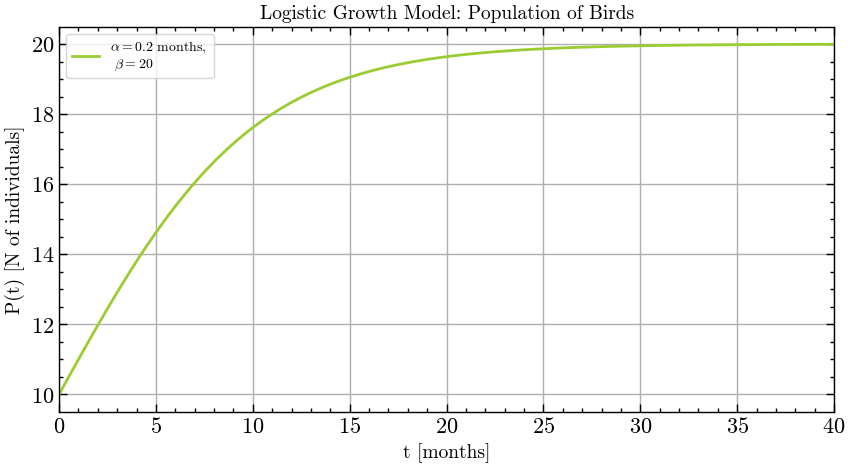

In [23]:
# Plot the solution

# Plotting the maximum force found

plt.figure(figsize=(10,5))

plt.plot(t_arr, P_arr, color = "yellowgreen", label = f"$\\alpha = {a}$ months, \n $\\beta = {b}$ ")

plt.title("Logistic Growth Model: Population of Birds", fontsize = 14.)
plt.xlabel("t [months]", fontsize = 14.)
plt.ylabel("P(t) [N of individuals]", fontsize = 14.)

plt.xlim(0.0, t_arr[-1])

plt.grid()
plt.legend(frameon = True, fontsize = 10.)

plt.show()

#### Please provide your answers to these questions in a markdown cell:

(d) Briefly comment on the behavior of the population size over time, and the eventual population size as $t \to \infty$.

What are the biological interpretations of the parameters $\alpha$ and $\beta$ ? 

The reintroduced population of birds increases over time, but the rate of increase slows as it approaches the value of $\beta$. Eventually, the population stabilizes at $\beta$, where the number of individuals remains constant. In this context, $\beta$ represents the maximum number of individuals that can coexist in the ecosystem, often referred to as the carrying capacity. Meanwhile, $\alpha$ models the growth rate, which is likely biologically related to the species reproduction rate and the influence of external factors.


(e) Why does the population growth slow down as $P(t)$ approaches $\beta$ ?

How might the model change if external factors (e.g., predators, diseases, or resource scarcity) are introduced

-The population growth rate decreases as $P(t)$ approaches $\beta$ because this is the maximum number of species that can coexist in an ecosystem. Therefore, this parameter can be related to food availability, space, or other necessities depending on the species. At this point, the number of births and deaths should stabilize, and their rates should be the same to maintain the number of individuals constant.

-If some external factor is introduced, the model should have an extra term to account for a higher number of deaths. Depending on the importance of the external factor, it could be linear or quadratic and probably will depend on another parameter that could also be adjusted. The new model could look as follow:

$$\frac{dP(t}{dt}=\alpha\,P(t)\left(1-\frac{P(t)}{\beta}\right)- \gamma P(t)$$

or

$$\frac{dP(t}{dt}=\alpha\,P(t)\left(1-\frac{P(t)}{\beta}\right)- \gamma P(t)^{2}$$

, where $\gamma$ represents the strength of the external factor.
